Exercise 3.3 Make a sawtooth chirp that sweeps from 2500 to 3000 Hz, then use it to make a wave with duration 1 s and frame rate 20 kHz. Draw a sketch of what you think the spectrum will look like. Then plot the spectrum and see if you got it right.

연습 3.3 2500Hz에서 3000Hz까지 쓸어버리는 톱니바퀴를 만든 다음, 그것을 이용하여 지속시간 1초와 프레임률 20kHz로 파동을 만든다. 스펙트럼이 어떻게 생겼는지 스케치를 그려라. 그런 다음 스펙트럼을 그려보고 제대로 이해했는지 확인하십시오.

In [3]:
from __future__ import print_function, division

%matplotlib inline

import thinkdsp
import thinkplot
import numpy as np
import math

import warnings
warnings.filterwarnings('ignore')

from IPython.html.widgets import interact, interact_manual, fixed
from IPython.html import widgets
from IPython.display import display

PI2 = 2 * math.pi

In [9]:
class SawtoothChirp(thinkdsp.Chirp):

    def _evaluate(self, ts, freq):
        
        dts = np.diff(ts) #각각의 ts의 차를 계산
        dphis = PI2 * freq * dts #위상을 계산한다.미분 하여 판단
        phases = np.cumsum(dphis) # 간격의 위상이 얼마나 변하는지 계산한다.
        phases = np.insert(phases, 0, 0) #dphis 시작에 0을 넣어라.
        
        cycles = phases / PI2
        frac, _ = np.modf(cycles) #정수 값 무시
        
        ys = self.amp * np.sign(thinkdsp.unbias(frac))
        return ys

Make a sawtooth chirp that sweeps from 2500 to 3000 Hz, then use it to make a wave with duration 1 s and frame rate 20 kHz. 

In [10]:
signal = SawtoothChirp(start=2500,end=3000)
wave = signal.make_wave(duration=1, framerate=20000)
wave.apodize()
wave.make_audio()


Draw a sketch of what you think the spectrum will look like.Then plot the spectrum and see if you got it right. 

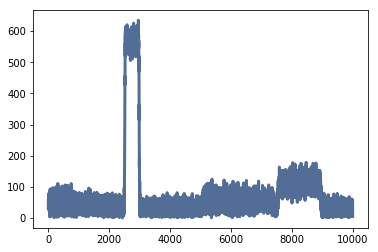

In [11]:
wave.make_spectrum().plot()

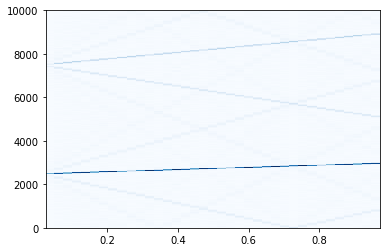

In [12]:
spectrogram = wave.make_spectrogram(1024)
spectrogram.plot()

2500Hz에서 3000Hz 사이에서 flat 한 현상을 볼 수 있다. 이는 신호가 각 빈번한 곳에서 동일한 시간을 소비함을 나타낸다.

framerate를 20000으로 할 경우 fold로 인해 소리의 높이가 차차 낮아지게 들린다. 하지만 framerate를 30000으로 sampling 하면 소리가 높아지는 것을 알 수 있다.
또한 주파수를 낮추면(start=220, end=880)으로 하면 소리가 차차 커짐을 알 수 있다